## Load data

In [95]:
import csv
import numpy as np

class Repository(object):
    def __init__(self,fileName):
        self.fileName = fileName
    def  loadData(self,inputColumn,outputColumn):
        data=[]
        columns=[]
        file = open(self.fileName)
        parsedData = csv.reader(file,delimiter=',')
       
        noLines = 0
        for line in parsedData:
            if noLines == 0:
                columns = line
            else:
                data.append(line)
            noLines += 1
        
        inputColumnIndex = columns.index(inputColumn)
        outputColumnIndex = columns.index(outputColumn)
    
        inputData = []
        outputData = []
        for j in range(len(data)):
            inputData.append(float(data[j][inputColumnIndex]))
            outputData.append(float(data[j][outputColumnIndex]))
        
        file.close()
        
        return inputData,outputData

In [96]:
filename = "data.csv"
repository = Repository(filename)
inputColumn = 'Economy..GDP.per.Capita.'
outputColumn = 'Happiness.Score'
inputDataResult,outputDataResult = repository.loadData(inputColumn, outputColumn)
print('inputs for column '+inputColumn[:5] +'is: \n'+str(inputDataResult))
print('outputs for column '+outputColumn[:5] +'is: \n'+str(outputDataResult))

inputs for column Econois: 
[1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327, 1.50394463539124, 1.47920441627502, 1.40570604801178, 1.49438726902008, 1.484414935112, 1.37538242340088, 1.10970628261566, 1.48709726333618, 1.54625928401947, 1.53570663928986, 1.48792338371277, 1.46378076076508, 1.74194359779358, 1.44163393974304, 1.25278460979462, 1.62634336948395, 1.10735321044922, 1.35268235206604, 1.18529546260834, 1.15318381786346, 1.69227766990662, 1.34327983856201, 1.21755969524384, 0.872001945972443, 1.23374843597412, 1.43092346191406, 1.12786877155304, 1.43362653255463, 1.38439786434174, 1.87076568603516, 1.07062232494354, 1.53062355518341, 1.36135590076447, 1.63295245170593, 1.32539355754852, 1.48841226100922, 1.29121541976929, 0.737299203872681, 1.00082039833069, 0.909784495830536, 1.29178786277771, 0.786441087722778, 1.39506661891937, 1.28177809715271, 0.907975316047668, 1.41691517829895, 1.31458234786987, 1.09186446666718, 1.26074862480164

### defining function for plotting the inputData and the outputData

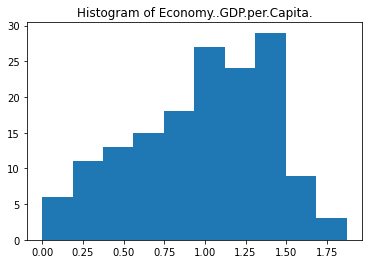

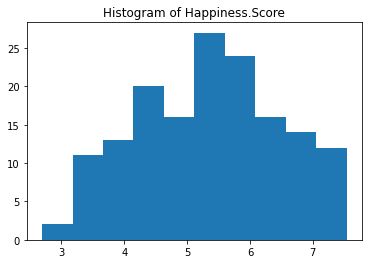

In [97]:
import matplotlib.pyplot as plt 

def plotDataHistogram(x, columnName):
    plt.hist(x, 10)
    plt.title('Histogram of ' + columnName)
    plt.show()
    
plotDataHistogram(inputDataResult,inputColumn)
plotDataHistogram(outputDataResult,outputColumn)

### defining plotting for the training data inputs

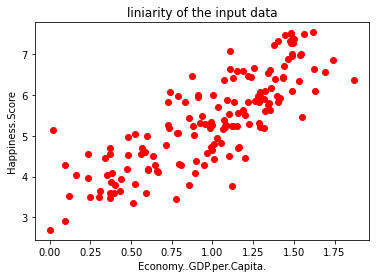

In [98]:
plt.title('liniarity of the input data')
plt.plot(inputDataResult,outputDataResult,'ro')
plt.xlabel(inputColumn)
plt.ylabel(outputColumn)
plt.show()

### separating training data from test data 20%-80%

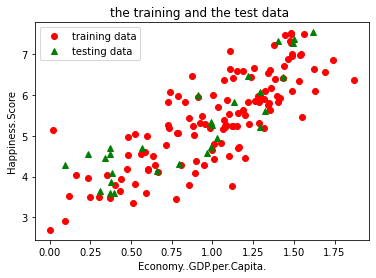

[1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327, 1.47920441627502, 1.484414935112, 1.37538242340088, 1.10970628261566, 1.48709726333618, 1.54625928401947, 1.53570663928986, 1.48792338371277, 1.46378076076508, 1.74194359779358, 1.44163393974304, 1.25278460979462, 1.62634336948395, 1.10735321044922, 1.35268235206604, 1.18529546260834, 1.15318381786346, 1.69227766990662, 1.34327983856201, 0.872001945972443, 1.23374843597412, 1.12786877155304, 1.43362653255463, 1.38439786434174, 1.87076568603516, 1.07062232494354, 1.53062355518341, 1.36135590076447, 1.63295245170593, 1.32539355754852, 1.48841226100922, 0.737299203872681, 1.00082039833069, 1.29178786277771, 0.786441087722778, 1.39506661891937, 1.28177809715271, 0.907975316047668, 1.41691517829895, 1.31458234786987, 1.09186446666718, 1.26074862480164, 1.40167844295502, 0.728870630264282, 1.21768391132355, 0.833756566047668, 1.28455626964569, 1.3469113111496, 1.3412059545517, 1.03522527217865, 1.18939554691315, 1.3559380

In [99]:
import numpy as np 
import math

np.random.seed(5)

# generate the positions of the data that will be a part of the test data
noTestDataIndexes = math.floor( 0.2 * len(inputDataResult))
testDataIndexes = []
for index in range(0,noTestDataIndexes):
    testDataIndexes.append(np.random.randint(0,len(inputDataResult)))

inputTest = []
outputTest = []
inputTraining = []
outputTraining = []
for i in range (0,len(inputDataResult)):
    if i in testDataIndexes :
        inputTest.append(inputDataResult[i])
        outputTest.append(outputDataResult[i])
    else:
        inputTraining.append(inputDataResult[i])
        outputTraining.append(outputDataResult[i])

# plotting differently the training and the test data 
plt.title('the training and the test data ')
plt.plot(inputTraining, outputTraining, 'ro', label = 'training data')
plt.plot(inputTest, outputTest, 'g^', label = 'testing data')
plt.xlabel(inputColumn)
plt.ylabel(outputColumn)
plt.legend()
plt.show()

print(inputTraining)
print(inputTest)


**Univariate linear-regression using BatchGD (tool)**

In [100]:
from sklearn import linear_model
# preparing the input data for the regressor ( matrix with one column - only one feature)
xx = [[el] for el in inputTraining]

#initialzie parameters for the learnt model
w0 = 0
w1 = 0
noOfIterations = 400
regressor = linear_model.SGDRegressor(loss='squared_loss',alpha = 0.01,shuffle=True,learning_rate='optimal')
# batch GD implies that after each iteration , the regressor's model is updated
for it in range(0,noOfIterations):
    # for each epoch the regressor updates the learnt model
    regressor.partial_fit(xx,outputTraining)
    # saving the learnt model after each epoch
    w0, w1 = regressor.intercept_[0], regressor.coef_[0]
    print('The learnt model in epoch '+str((it+1))+'is f(x) = ', w0, ' + ', w1, ' * x')
    
print('The final learnt model is f(x) = ', w0, ' + ', w1, ' * x')

The learnt model in epoch 1is f(x) =  200360443.47062925  +  -217132191.48095557  * x
The learnt model in epoch 2is f(x) =  770454.4879071662  +  -582093.6770829103  * x
The learnt model in epoch 3is f(x) =  30384.58502289991  +  -36105.027535693924  * x
The learnt model in epoch 4is f(x) =  4087.660495199348  +  -3616.1646610125426  * x
The learnt model in epoch 5is f(x) =  678.3731351877507  +  -547.1300066859166  * x
The learnt model in epoch 6is f(x) =  146.194962578242  +  -134.10363357670158  * x
The learnt model in epoch 7is f(x) =  45.099197448845715  +  -38.374399155801484  * x
The learnt model in epoch 8is f(x) =  18.84090780815262  +  -11.068929269153701  * x
The learnt model in epoch 9is f(x) =  8.97752140640242  +  -3.0291636135599784  * x
The learnt model in epoch 10is f(x) =  5.8979068551448135  +  0.1623562430338791  * x
The learnt model in epoch 11is f(x) =  4.301087506535405  +  1.0546086507342005  * x
The learnt model in epoch 12is f(x) =  3.833915436956956  +  1.591

### plotting the linear learnt model from the training data

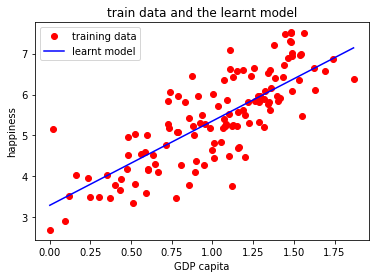

In [101]:
noOfPoints = 1000
xref = []
val = min(inputTraining)
step = (max(inputTraining) - min(inputTraining)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(inputTraining, outputTraining, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

## test the lernt model on test data set

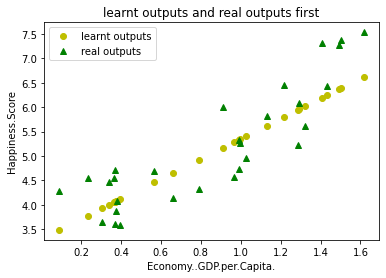

In [102]:


computedTestOutputs = regressor.predict([[x] for x in inputTest])

plt.plot(inputTest, computedTestOutputs, 'yo', label = 'learnt outputs')  #computed test data are plotted yellow red and circle sign
plt.plot(inputTest, outputTest, 'g^', label = 'real outputs')  #real test data are plotted by green triangles
plt.title('learnt outputs and real outputs first')
plt.xlabel(inputColumn)
plt.ylabel(outputColumn)
plt.legend()
plt.show()

### error calculation

In [103]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(outputTest, computedTestOutputs)
print('prediction error  (tool):  ', error)

prediction error  (tool):   0.3544775884360262
